## Processing Files
- Load file contents
- Process values and place into useable vars

In [1]:
import csv

In [2]:
# define the file path
sweep_file_path = './sweep_matrix_multiply_performance_data.csv'

# define initial global values - referenced in lower cells for plotting/processing
sweep_row_values = []
sweep_col_values = []
sweep_time_data = []

# read and process data from the parallel file
with open(sweep_file_path) as sweep_data_file:
    line = sweep_data_file.readline()
    while line:
        line = sweep_data_file.readline()
        if (line == ''): break
        line_list = line.split(',')
        
        # for each line, append the values for the row, col, and data to their respectively defined python lists
        sweep_row_values.append(float(line_list[0]))
        sweep_col_values.append(float(line_list[1]))
        # data requires nested processing to parse all string elements to doubles
        data_list_temp = []
        for line_list_x in line_list[2:len(line_list)]:
            data_list_temp.append(float(line_list_x))
        sweep_time_data.append(data_list_temp)
        

## Further Data Processing (Speedup & Efficiency)

In [3]:

# define list for later plotting/processing
speedup_list = []
for par_x in sweep_time_data:
    sublist_holder = []
    for par_y in par_x:
        # below represents getting the serial time data and dividing it by the parallel time for the same matrix size, but a different number of threads
        sublist_holder.append(par_x[0] / par_y)
    speedup_list.append(sublist_holder)

# define list for later plotting
efficiency_list = []
for speedup_x in speedup_list:
    speedup_counter = 0
    sublist_holder = []
    for speedup_y in speedup_x:
        # take speedup value found in the processing above and divide it by the number of threads used for the computation
        sublist_holder.append(speedup_y/ (speedup_counter + 1))
        speedup_counter = speedup_counter + 1
    efficiency_list.append(sublist_holder)
    


## Plotting Operations
- Ensure matplotlib is inserted into the notebook
- Import the required libraries
- Set plot values for each line

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

## Plot - Threads vs Time

Text(0.5,1,'Matrix Multiply - Number of Threads vs Time')

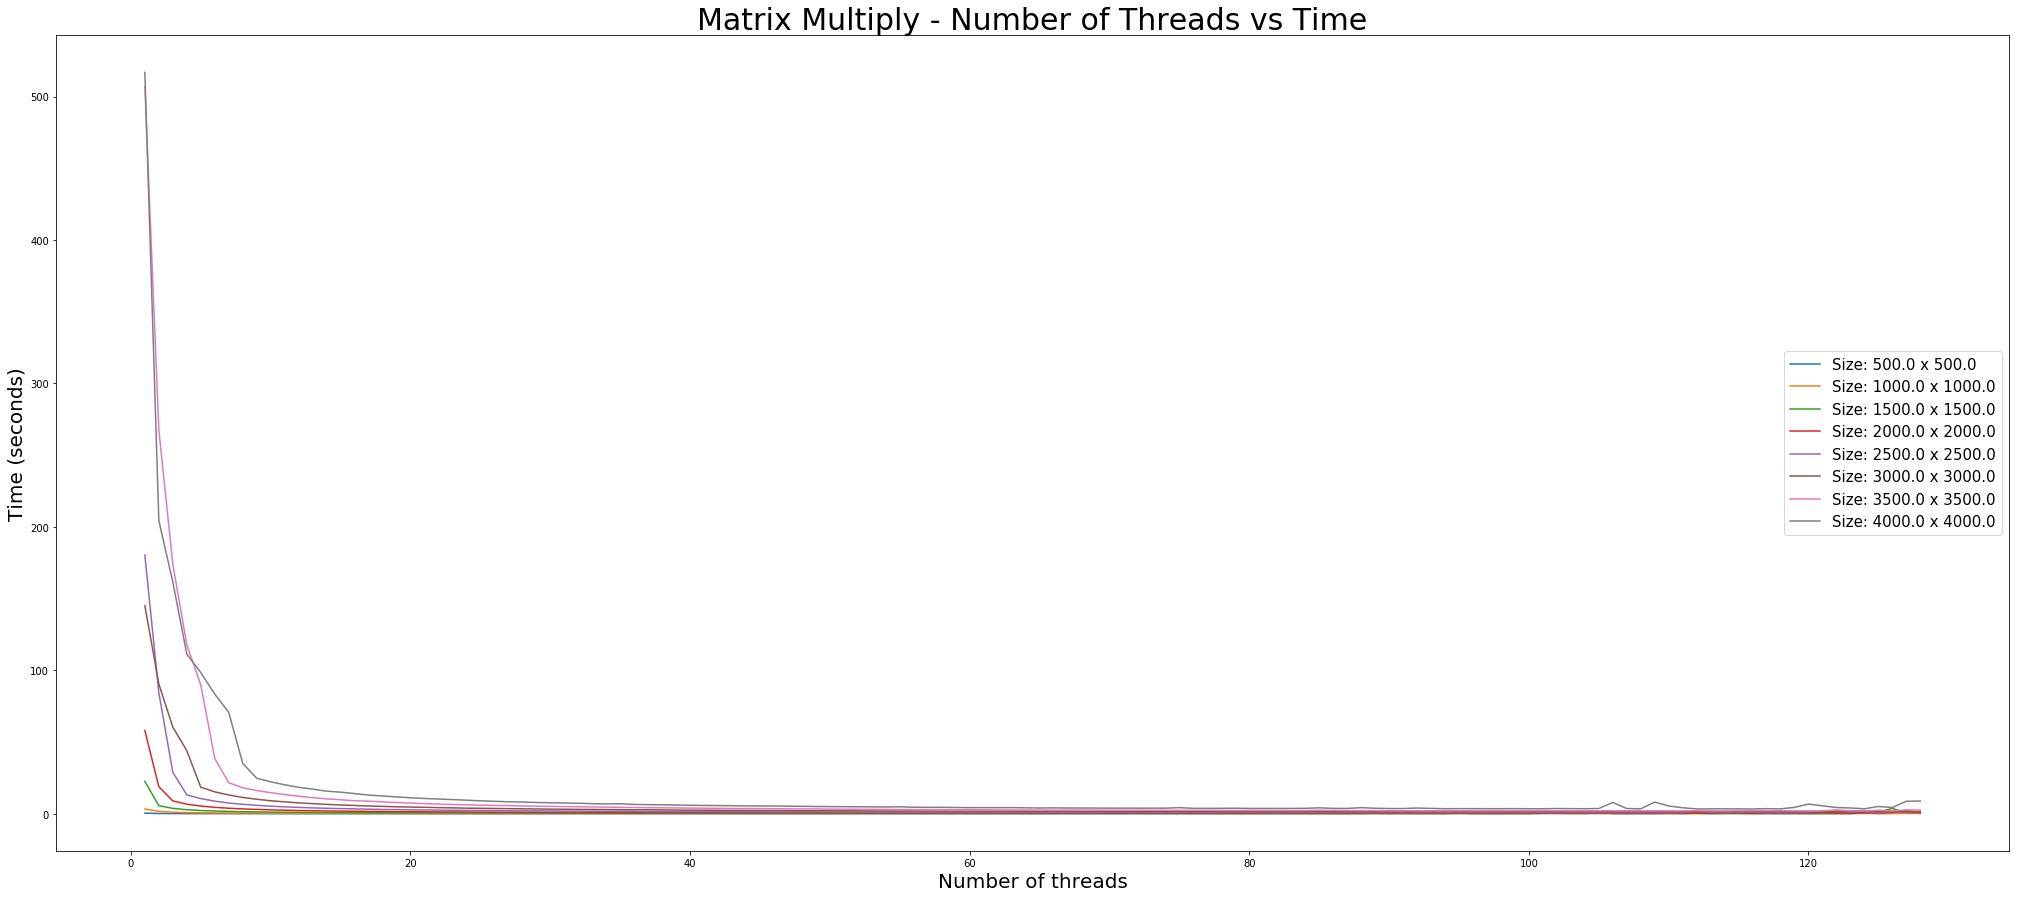

In [6]:
# set the figure size
plt.figure(figsize=(35,15))

# i = 0
# while i < len(serial_row_values):
# #    plt.plot([1], serial_time_data[i], 'go-', label=('' + str(serial_row_values[i]) + ' x ' + str(serial_col_vlaues[i])))
#     label_value =('Serial: ' + str(serial_row_values[i]) + ' x ' + str(serial_col_values[i]))
#     plt.plot([1], serial_time_data[i], 'go-', label=label_value)
#     i = i + 1


i = 0
# plot the sweep values on the graph
while i < len(sweep_time_data):
    label_value =('Size: ' + str(sweep_row_values[i]) + ' x ' + str(sweep_col_values[i]))
    plt.plot(range(1, len(sweep_time_data[i]) + 1), sweep_time_data[i], label=label_value) 
    i = i + 1
    
# specify graph metadata
plt.legend(loc='center right', fontsize=15)
plt.xlabel('Number of threads', fontsize=20)
plt.ylabel('Time (seconds)', fontsize=20)
plt.title('Matrix Multiply - Number of Threads vs Time', fontsize=30)



## Plotting Speedup

Text(0.5,1,'Matrix Multiply - Speedup')

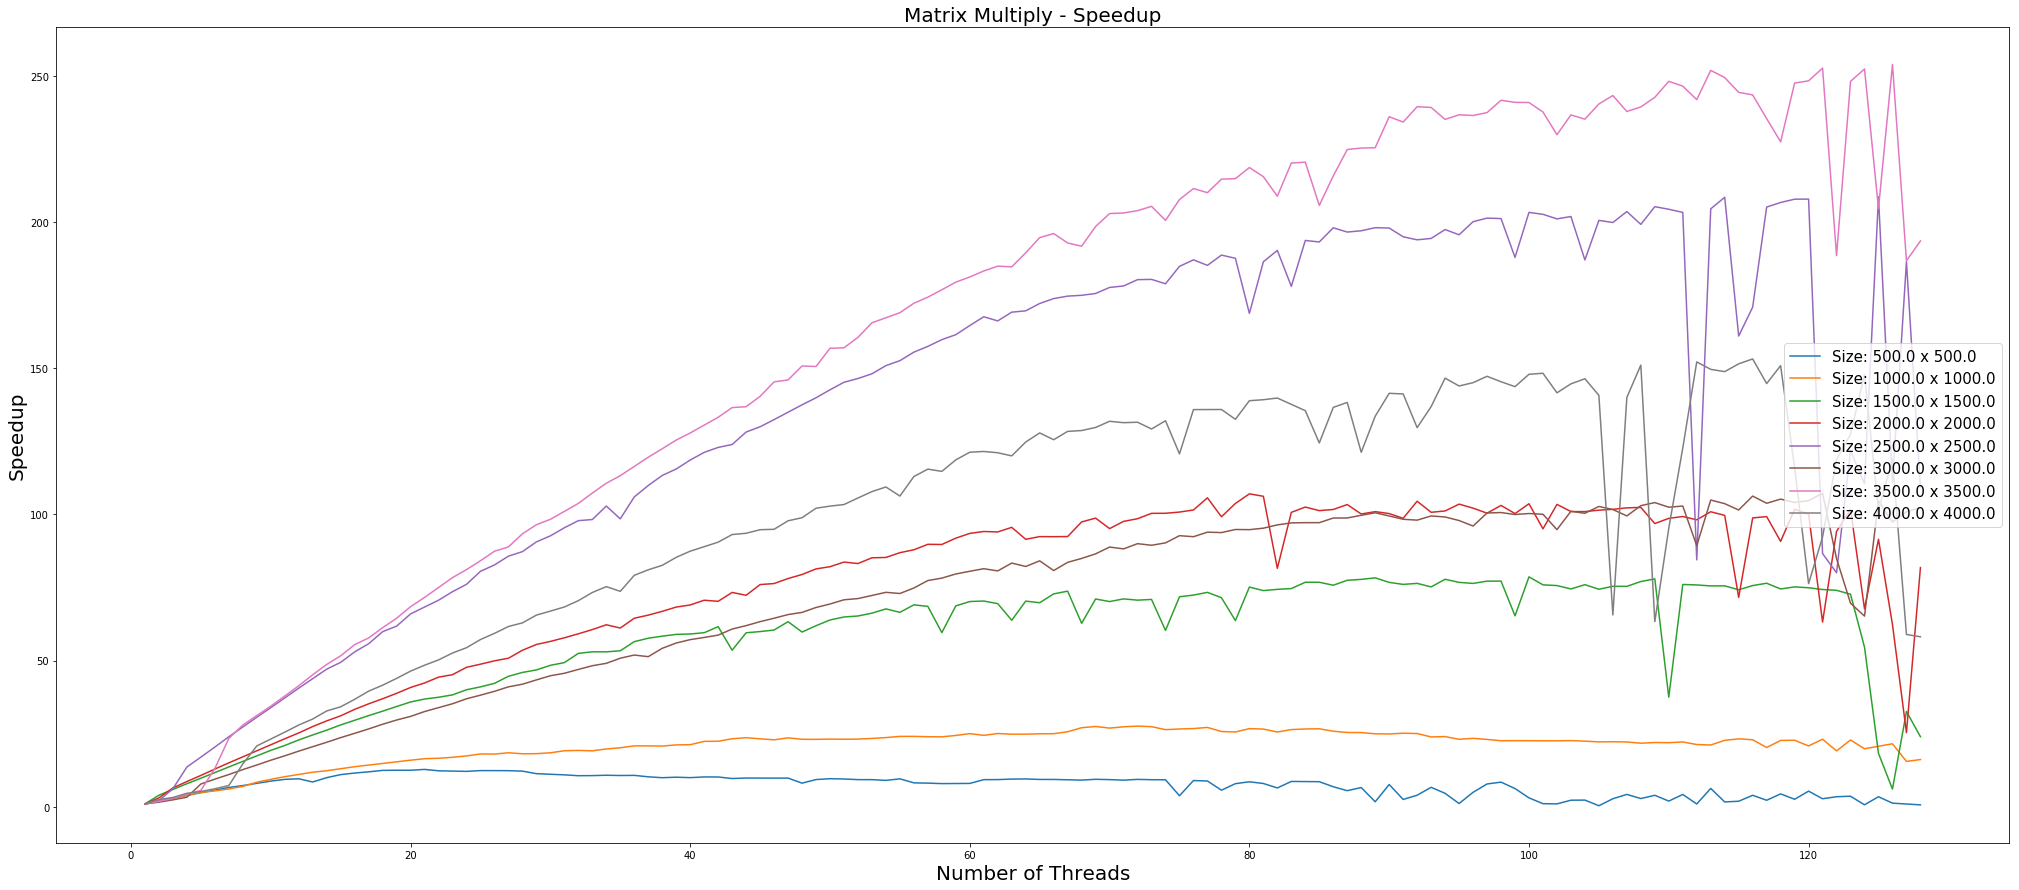

In [7]:
# specify graph size
plt.figure(figsize=(35,15))


# plot efficiency lines using loop
i = 0
while i < len(speedup_list):
    label_value =('Size: ' + str(sweep_row_values[i]) + ' x ' + str(sweep_col_values[i]))
    plt.plot(range(1, len(speedup_list[i]) + 1) ,speedup_list[i], label=label_value) 
    i = i + 1
# specify graph metadata
plt.legend(loc='center right', fontsize=15)
plt.xlabel('Number of Threads', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.title('Matrix Multiply - Speedup', fontsize=20)

## Plotting Efficiency

Text(0.5,1,'Matrix Multiply - Efficiency')

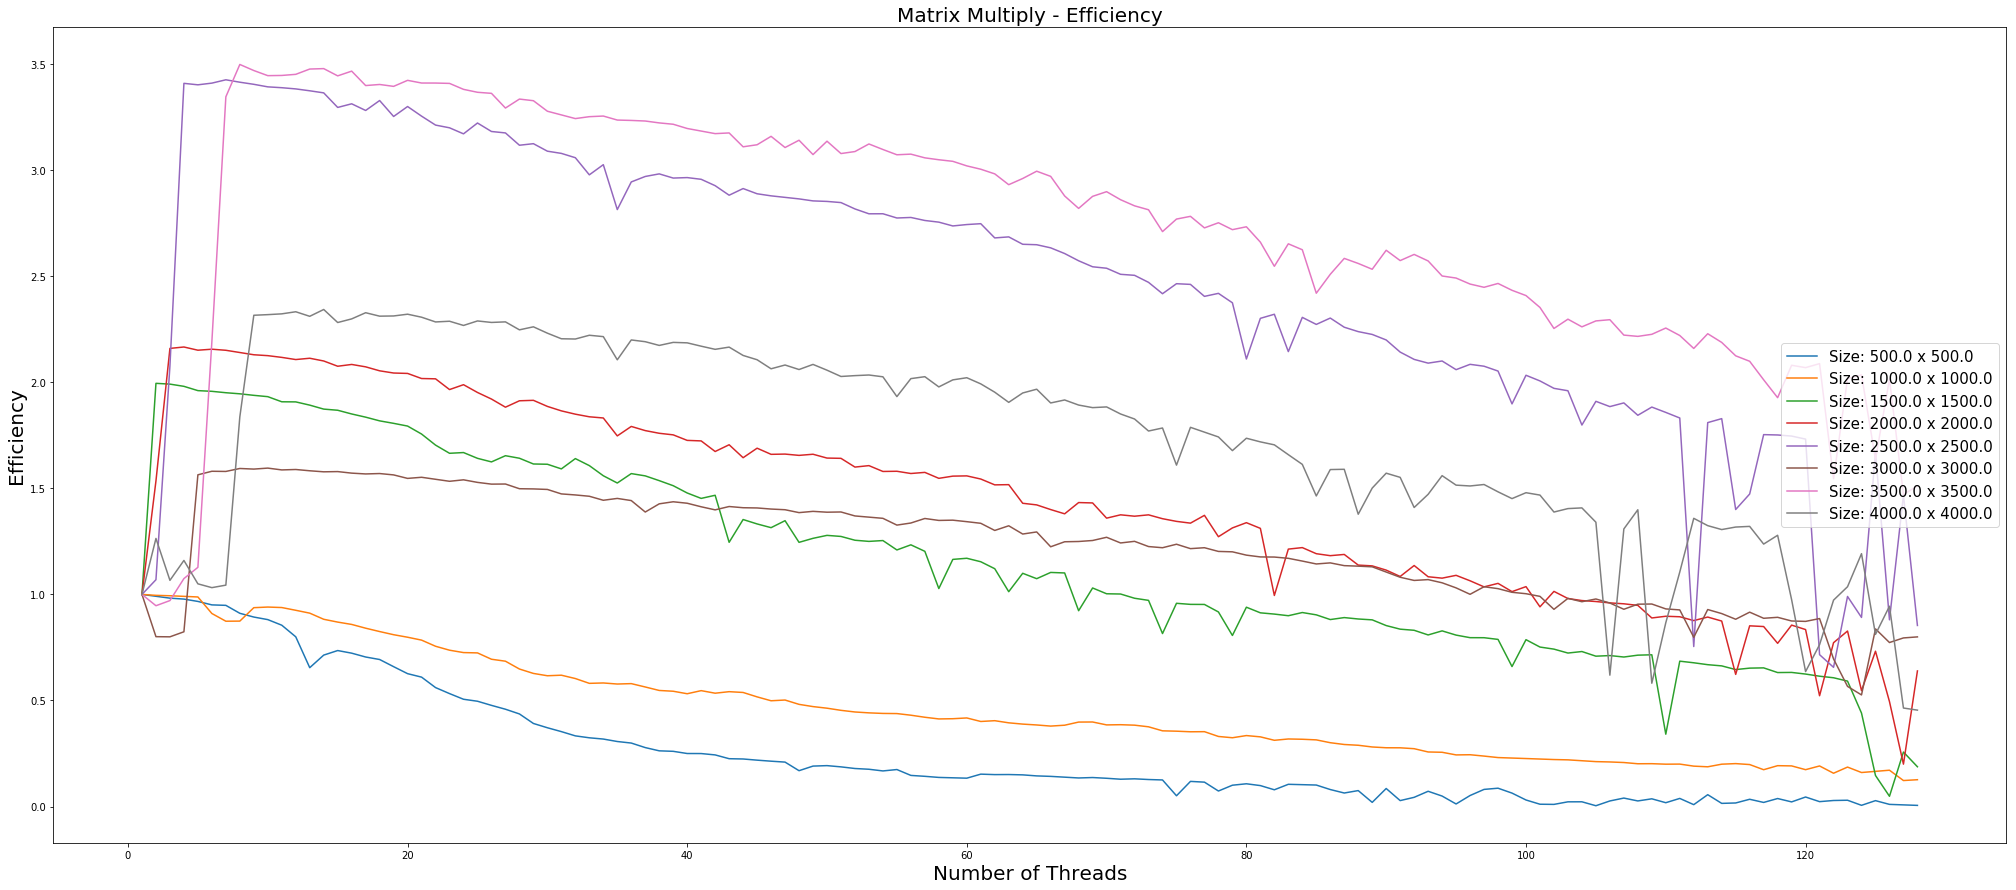

In [8]:
# see comments for above plotting as this cell only differs by the data used (efficiency matrix)
plt.figure(figsize=(35,15))


i = 0
while i < len(efficiency_list):
    label_value =('Size: ' + str(sweep_row_values[i]) + ' x ' + str(sweep_col_values[i]))
    plt.plot(range(1, len(efficiency_list[i]) + 1) ,efficiency_list[i], label=label_value) 
    i = i + 1
plt.legend(loc='center right', fontsize=15)
plt.xlabel('Number of Threads', fontsize=20)
plt.ylabel('Efficiency', fontsize=20)
plt.title('Matrix Multiply - Efficiency', fontsize=20)